In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Read data
df = pd.read_csv('/Users/jaishreejoshita/Desktop/Loan_Data.csv')
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [46]:
# Check data types of columns
print(df.dtypes)

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object


In [47]:
# Check for missing values
print(df.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [48]:
# Get summary statistics
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [49]:
# Define the feature set and target variable
X = df.drop(['default', 'customer_id'], axis=1)
Y = df['default']

In [50]:
# Split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# Normalize the numerical variable
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

In [53]:
# Logistic Regression model
model = LogisticRegression()

In [54]:
# Train the model
model.fit(X_train, Y_train)

LogisticRegression()

In [55]:
# Prediction on test dataset
Y_pred = model.predict(X_test)

In [56]:
df_out_regression = pd.DataFrame(X_test)
df_out_regression['Y_test'] = Y_test
df_out_regression['Y_pred'] = Y_pred
df_out_regression.to_csv('/Users/jaishreejoshita/Desktop/output_regression.csv', index=False)

In [18]:
# Print the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [21]:
# Calulate expected loss function
def calculate_expected_loss(model, loan_features, recovery_rate=0.1):
    # Normalize the loan feature
    loan_features = scaler.transform(loan_features)
    # Predict the probability of default
    pd = model.predict_proba(loan_features)[:,1]
    # Calculate loss given default
    lgd = 1 - recovery_rate
    # Calculate exposure at default
    ead = loan_features[:,1]
    # Calculate expected loss
    expected_loss = pd*ead*lgd
    return expected_loss

In [22]:
loan_features = X_test[0].reshape(1,-1)
expected_loss = calculate_expected_loss(model, loan_features)
print(f'Expected loss: ${expected_loss[0]:.2f}')

Expected loss: $-1.88


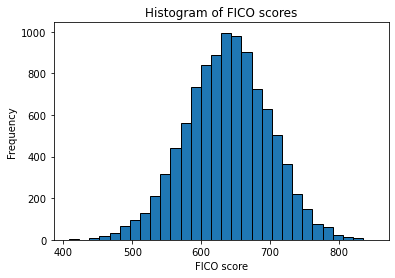

In [26]:
# Plot histogram of FICO scores
plt.hist(df['fico_score'], bins=30, edgecolor='black')
plt.title('Histogram of FICO scores')
plt.xlabel('FICO score')
plt.ylabel('Frequency')
plt.show()

In [27]:
df['fico_score_bin'] = pd.qcut(df['fico_score'], q=10)
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_score_bin
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,"(587.0, 607.0]"
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,"(560.0, 587.0]"
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,"(587.0, 607.0]"
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,"(607.0, 623.0]"
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,"(623.0, 638.0]"


In [28]:
# Number of ratings
num_ratings = 10
# Create rating map using equal frequency binning
df['rating'], bins = pd.qcut(df['fico_score'], q = num_ratings, labels = range(num_ratings, 0, -1), retbins=True)
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_score_bin,rating
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,"(587.0, 607.0]",8
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,"(560.0, 587.0]",9
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,"(587.0, 607.0]",8
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,"(607.0, 623.0]",7
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,"(623.0, 638.0]",6


In [31]:
# Define the feature set and target set
X = df.drop(['default', 'customer_id', 'fico_score', 'fico_score_bin'], axis=1)
Y = df['default']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
model = DecisionTreeClassifier()

In [34]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [35]:
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1652
           1       0.98      0.97      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [36]:
df_out_decisiontree = pd.DataFrame(X_test)
df_out_decisiontree

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,rating
6252,2,3584.844437,7708.784716,72005.83951,8,8
4684,3,5821.006507,16345.025390,80431.47019,6,6
1731,5,5343.193215,30614.603030,86303.95374,4,8
4742,0,1468.268561,1369.352513,28621.64224,5,7
4521,1,3519.975193,9027.320474,69844.46479,6,5
...,...,...,...,...,...,...
6412,1,7202.353227,10821.920370,101898.87450,5,4
8285,0,6863.007842,5147.907002,88837.64850,4,9
7853,2,4038.730317,9726.843194,75006.40180,4,5
1095,1,1118.592485,2154.883645,20118.35008,6,1


In [38]:
df_out_decisiontree['Y_test'] = Y_test
df_out_decisiontree['Y_Pred'] = Y_pred

In [40]:
df_out_decisiontree.to_csv('/Users/jaishreejoshita/Desktop/output_decision_tree.csv', index=False)

In [58]:
df_out_decisiontree.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,rating,Y_test,Y_Pred
6252,2,3584.844437,7708.784716,72005.83951,8,8,0,0
4684,3,5821.006507,16345.025390,80431.47019,6,6,0,0
1731,5,5343.193215,30614.603030,86303.95374,4,8,1,1
4742,0,1468.268561,1369.352513,28621.64224,5,7,0,0
4521,1,3519.975193,9027.320474,69844.46479,6,5,0,0
